**Data organisation:**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [14]:
#set1
socialspending = pd.read_csv('socialspending2.csv')

In [15]:
socialspending.rename(columns={'geo':'country','OBS_VALUE':'percentage of GDP','TIME_PERIOD':'year'},inplace=True)

In [16]:
socialspending.drop(['DATAFLOW','LAST UPDATE','freq','unit','spdeps','OBS_FLAG','CONF_STATUS'],axis=1,inplace=True)

In [17]:
socialspending_pd = pd.DataFrame(socialspending)

In [19]:
socialspending_pd['mean'] = socialspending.groupby('country')['percentage of GDP'].transform('mean')

In [21]:
socialspending_pd['percentage of GDP'] = socialspending_pd['percentage of GDP'].fillna(socialspending_pd['mean'])

In [24]:
socialspending_pd.drop(['mean'],axis=1,inplace=True)

In [25]:
socialspending_pd

,country,year,percentage of GDP
0,Albania,2012,12.59
1,Albania,2013,12.59
2,Albania,2014,12.59
3,Albania,2015,12.59
4,Albania,2016,12.59
...,...,...,...
451,United Kingdom,2019,27.00
452,United Kingdom,2020,27.00
453,United Kingdom,2021,27.00
454,United Kingdom,2022,27.00


In [26]:
#set2
education = pd.read_csv('childreneducation.csv')

In [ ]:
education.drop(['DATAFLOW','LAST UPDATE','freq','unit','OBS_FLAG','CONF_STATUS'],axis=1,inplace=True)

In [33]:
education.rename(columns={'geo':'country','TIME_PERIOD':'year','OBS_VALUE':'children in education'},inplace=True)

In [44]:
education.columns

Index(['sex', 'country', 'year', 'children in education'], dtype='object')

In [37]:
educationfin = pd.DataFrame(education)

In [50]:
educationfin['children in education'] = educationfin['children in education'].fillna(value=educationfin['children in education'].groupby
                                                                                     (educationfin["country"]).transform('mean'))

In [53]:
educationfin.drop(['sex'],axis=1,inplace=True)

In [54]:
educationfin

,country,year,children in education
0,Austria,2013,86.500000
1,Austria,2014,86.900000
2,Austria,2015,88.100000
3,Austria,2016,88.500000
4,Austria,2017,89.300000
...,...,...,...
391,United Kingdom,2019,100.000000
392,United Kingdom,2020,98.142857
393,United Kingdom,2021,98.142857
394,United Kingdom,2022,98.142857


In [63]:
finalset = pd.merge(socialspending_pd, educationfin, on=['country','year'])

In [64]:
finalset

,country,year,percentage of GDP,children in education
0,Austria,2013,29.83,86.500000
1,Austria,2014,30.00,86.900000
2,Austria,2015,29.97,88.100000
3,Austria,2016,29.91,88.500000
4,Austria,2017,29.48,89.300000
...,...,...,...,...
391,United Kingdom,2019,27.00,100.000000
392,United Kingdom,2020,27.00,98.142857
393,United Kingdom,2021,27.00,98.142857
394,United Kingdom,2022,27.00,98.142857


**Analysis:**

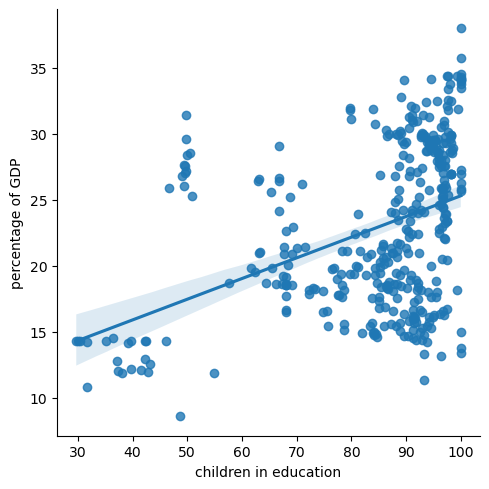

In [73]:
sns.lmplot(x='children in education',y='percentage of GDP',data=finalset)

In [74]:
import plotly.express as px

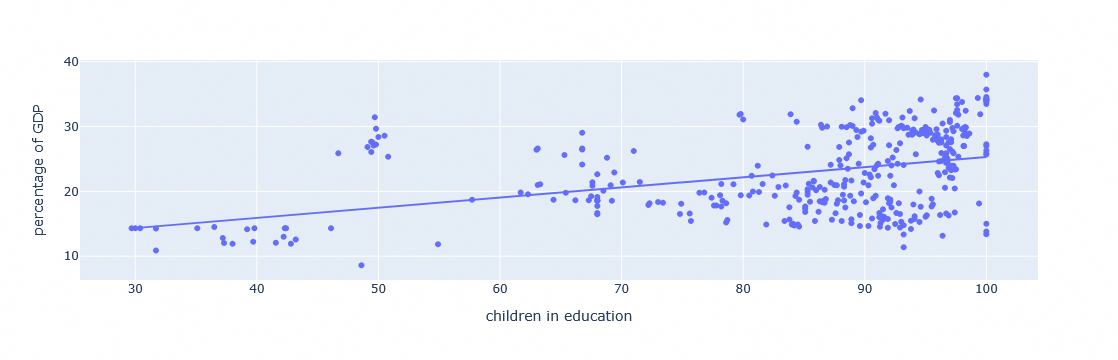

In [78]:
px.scatter(finalset,x='children in education',y='percentage of GDP',trendline='ols')

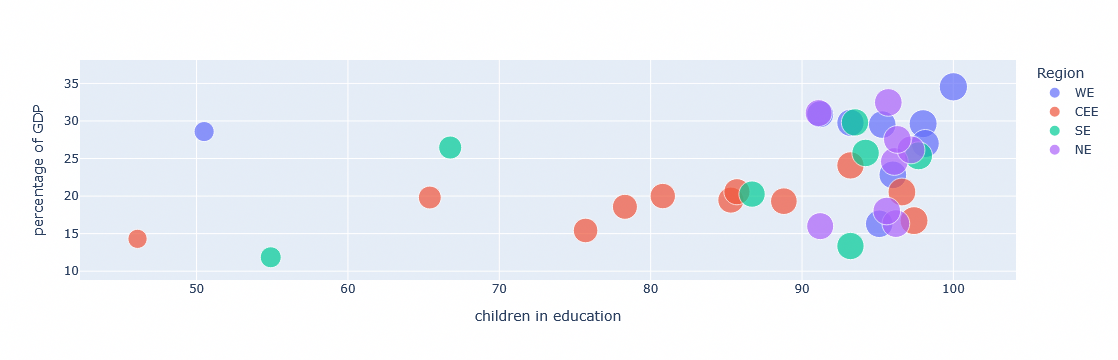

In [99]:
px.scatter(finalset.query('year==2023'),x='children in education', y='percentage of GDP',size='children in education',color='Region',
          hover_name='country')

In [95]:
regions = pd.read_excel('regions.xlsx')

In [97]:
finalset = pd.merge(finalset,regions, on=['country'])

In [98]:
finalset

,country,year,percentage of GDP,children in education,Region
0,Austria,2013,29.83,86.500000,WE
1,Austria,2014,30.00,86.900000,WE
2,Austria,2015,29.97,88.100000,WE
3,Austria,2016,29.91,88.500000,WE
4,Austria,2017,29.48,89.300000,WE
...,...,...,...,...,...
391,United Kingdom,2019,27.00,100.000000,WE
392,United Kingdom,2020,27.00,98.142857,WE
393,United Kingdom,2021,27.00,98.142857,WE
394,United Kingdom,2022,27.00,98.142857,WE


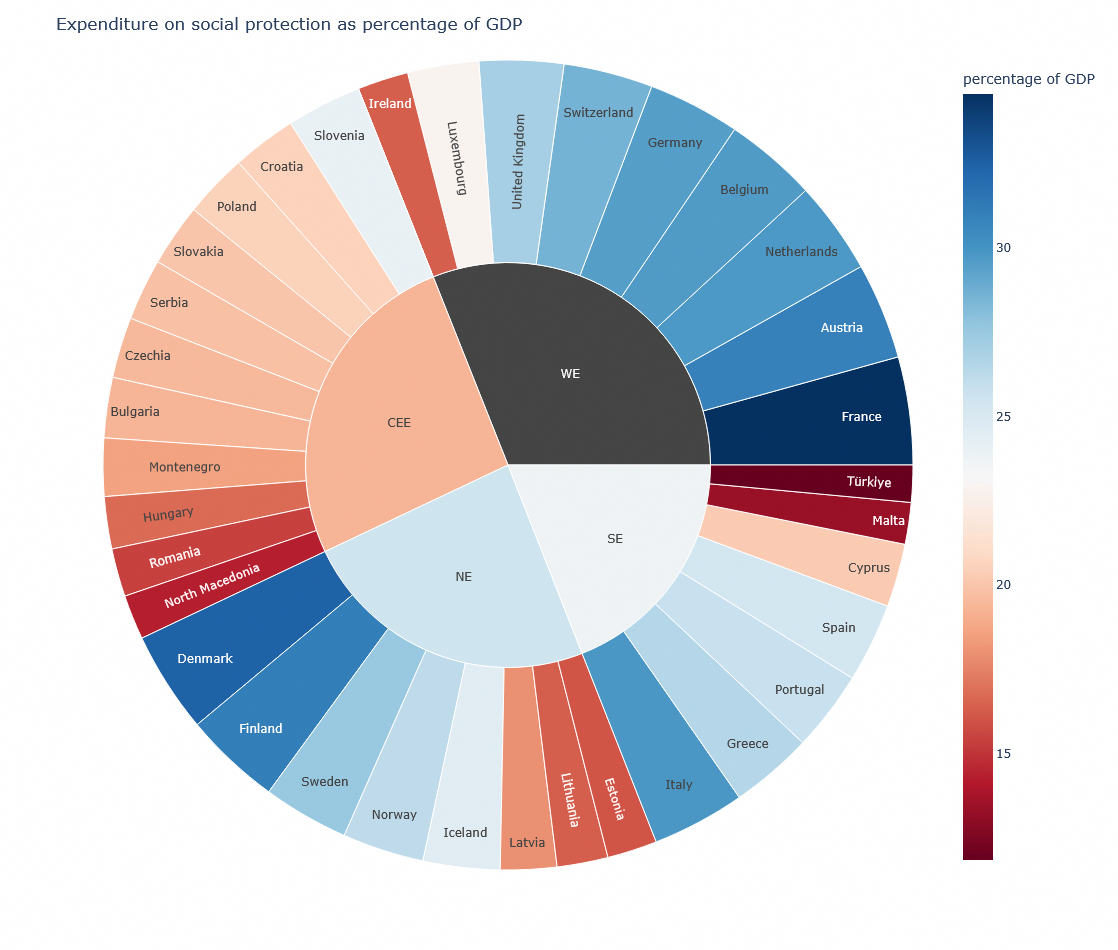

In [119]:
df = finalset.query('year==2023')
grafic = px.sunburst(df, path=['Region','country'],values='percentage of GDP',
           color='percentage of GDP',color_continuous_scale='RdBu',
           color_continuous_midpoint = np.average(finalset['percentage of GDP'], weights=finalset['percentage of GDP']), width=950, height=950)
grafic.update_layout(title='Expenditure on social protection as percentage of GDP')